In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.interpolate import make_interp_spline

In [2]:
# root_path = Path(f"C:/Users/abdel/Documents/Work/_fog_computing/results/plots/last")

In [3]:
objectives = ['distance', 'load', 'priority']
evaluation = ['evaluation_distance', 'evaluation_load', 'evaluation_priority']
moo = ['moo_asf', 'moo_pw', 'moo_topsis', 'moo_wsm']

In [4]:
cmap = plt.cm.get_cmap('Dark2', 7)
plt.style.use('seaborn')

# Learning Plots

In [5]:
data = {}
xmax = []
normalization = {
    'load': {
        'max': -np.inf,
        'min': np.inf
    },
    'distance': {
        'max': -np.inf,
        'min': np.inf
    },
    'priority': {
        'max': -np.inf,
        'min': np.inf
    },
}
for i, obj in enumerate(objectives):
    for j, drl in enumerate(evaluation):
        if drl in list(data.keys()):
            data[drl][obj] = pd.read_csv(f'return_{obj}/{drl}.csv')
        else:
            data[drl] = {
                obj: pd.read_csv(f'return_{obj}/{drl}.csv')
            }
        xmax.append(np.max(data[drl][obj]['Step'].to_numpy()))
        normalization[obj]['max'] = max(normalization[obj]['max'], np.max(data[drl][obj]['Value'].to_numpy()))
        normalization[obj]['min'] = min(normalization[obj]['min'], np.min(data[drl][obj]['Value'].to_numpy()))
xmax = min(xmax)
print(f"xmax: {xmax}")
normalization

xmax: 76


{'load': {'max': -223.85899353027344, 'min': -956.2788696289062},
 'distance': {'max': -645990.0, 'min': -1134418.0},
 'priority': {'max': -2070.8583984375, 'min': -7471.04638671875}}

In [6]:
smoothing_factor = .9

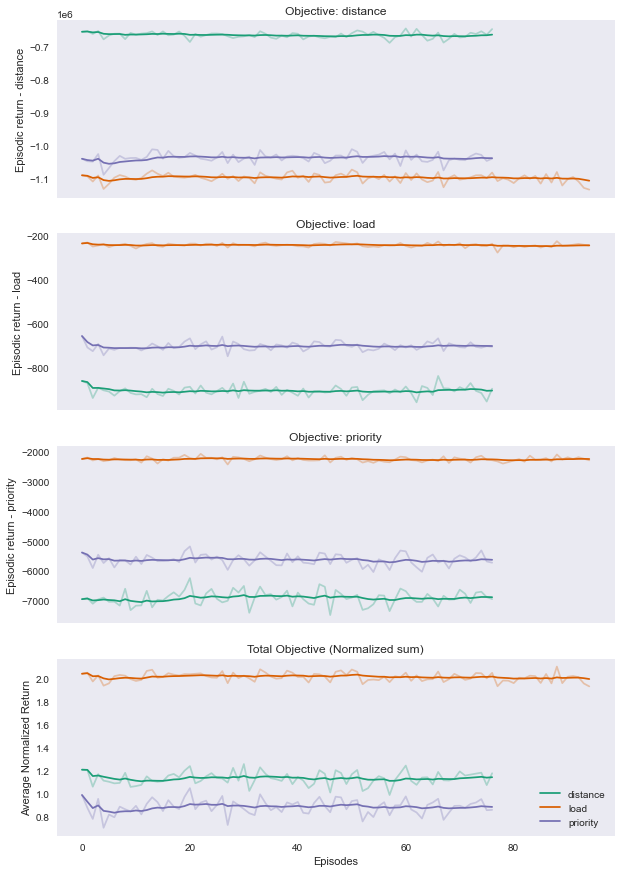

In [7]:
# Share a X axis with each column of subplots
fig, axs = plt.subplots(4, 1, sharex='col')
fig.set_figheight(15)
fig.set_figwidth(10)
for i, obj in enumerate(objectives):
    for j, drl in enumerate(objectives):
        if drl in list(data.keys()):
            data[drl][obj] = pd.read_csv(f'return_{obj}/evaluation_{drl}.csv')
        else:
            data[drl] = {
                obj: pd.read_csv(f'return_{obj}/evaluation_{drl}.csv')
            }
        x = data[drl][obj]['Step'].to_numpy()
        y = data[drl][obj]['Value'].to_numpy()
        axs[i].plot(x, y, alpha=.3, color=cmap(j))  # color=cmap(j)
        # Tensorboard smoothing
        y = data[drl][obj]['Value'].ewm(alpha=(1 - smoothing_factor)).mean().to_numpy()
        axs[i].plot(x, y, label=drl, color=cmap(j))

    axs[i].set_title(f'Objective: {obj}')
    axs[i].grid()
    axs[i].set_ylabel(f'Episodic return - {obj}')
    
i = 3
for j, drl in enumerate(objectives):
    x = data[drl]['load']['Step'].to_numpy()
    y = (data[drl]['load']['Value'] - normalization['load']['min']) / (normalization['load']['max']-normalization['load']['min'])
    y += (data[drl]['distance']['Value'] - normalization['distance']['min']) / (normalization['distance']['max']-normalization['distance']['min'])
    y += (data[drl]['priority']['Value'] - normalization['priority']['min']) / (normalization['priority']['max']-normalization['priority']['min'])
    axs[i].plot(x, y.to_numpy(), alpha=.3, color=cmap(j))
    # Tensorboard smoothing
    y = y.ewm(alpha=(1 - smoothing_factor)).mean().to_numpy()
    axs[i].plot(x, y, label=drl, color=cmap(j))

    axs[i].set_title(f'Total Objective (Normalized sum)')
    axs[i].grid()
    
    axs[i].set_xlabel(f'Episodes')
    axs[i].set_ylabel(f'Average Normalized Return')
plt.legend()
plt.show()

# Evaluation

In [8]:
moo = ['nsga2', 'moead']

In [9]:
data = {}
xmax = []
normalization = {
    'load': {
        'max': -np.inf,
        'min': np.inf
    },
    'distance': {
        'max': -np.inf,
        'min': np.inf
    },
    'priority': {
        'max': -np.inf,
        'min': np.inf
    },
}
for i, obj in enumerate(objectives):
    for j, drl in enumerate(evaluation+moo+['naive', 'naive_random']):
        if drl in list(data.keys()):
            data[drl][obj] = pd.read_csv(f'return_{obj}/{drl}.csv')
        else:
            data[drl] = {
                obj: pd.read_csv(f'return_{obj}/{drl}.csv')
            }
        xmax.append(np.max(data[drl][obj]['Step'].to_numpy()))
        normalization[obj]['max'] = max(normalization[obj]['max'], np.max(data[drl][obj]['Value'].to_numpy()))
        normalization[obj]['min'] = min(normalization[obj]['min'], np.min(data[drl][obj]['Value'].to_numpy()))
xmax = min(xmax)
print(f"xmax: {xmax}")
normalization

xmax: 76


{'load': {'max': -223.85899353027344, 'min': -956.2788696289062},
 'distance': {'max': -361222.0, 'min': -1134418.0},
 'priority': {'max': -2070.8583984375, 'min': -11105.2255859375}}

In [10]:
average_perf = {}

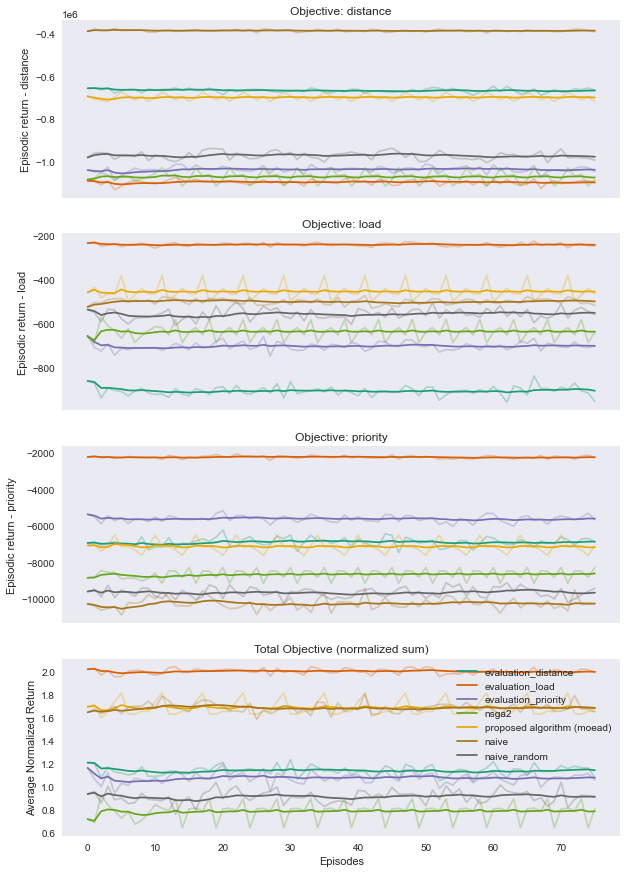

In [11]:
# Share a X axis with each column of subplots
fig, axs = plt.subplots(4, 1, sharex='col')
fig.set_figheight(15)
fig.set_figwidth(10)
for i, obj in enumerate(objectives):
    for j, drl in enumerate(evaluation+moo+['naive', 'naive_random']):
        x = data[drl][obj]['Step'].to_numpy()
        y = data[drl][obj]['Value'].to_numpy()
        axs[i].plot(np.arange(xmax), y[:xmax], alpha=.3, color=cmap(j))  # color=cmap(j)
        # Tensorboard smoothing
        y = data[drl][obj]['Value'].ewm(alpha=(1 - smoothing_factor)).mean().to_numpy()
        axs[i].plot(np.arange(xmax), y[:xmax], label=drl.replace('moo_', 'NSGA2+'), color=cmap(j))

    axs[i].set_title(f'Objective: {obj}')
    axs[i].grid()
    
    axs[i].set_ylabel(f'Episodic return - {obj}')
    
i = 3
for j, drl in enumerate(evaluation+moo+['naive', 'naive_random']):
    x = data[drl]['load']['Step'].to_numpy()
    y = (data[drl]['load']['Value'] - normalization['load']['min']) / (normalization['load']['max']-normalization['load']['min'])
    y += (data[drl]['distance']['Value'] - normalization['distance']['min']) / (normalization['distance']['max']-normalization['distance']['min'])
    y += (data[drl]['priority']['Value'] - normalization['priority']['min']) / (normalization['priority']['max']-normalization['priority']['min'])
    
    average_perf[drl] = y.mean()
    
    axs[i].plot(np.arange(xmax), y.to_numpy()[:xmax], alpha=.3, color=cmap(j))
    # Tensorboard smoothing
    y = y.ewm(alpha=(1 - smoothing_factor)).mean().to_numpy()
    if drl == 'moead':
        drl = 'proposed algorithm (moead)'
        
    axs[i].plot(np.arange(xmax), y[:xmax], label=drl.replace('moo_', 'NSGA2+'), color=cmap(j))

    axs[i].set_title(f'Total Objective (normalized sum)')
    axs[i].grid()
    
    axs[i].set_xlabel(f'Episodes')
    axs[i].set_ylabel(f'Average Normalized Return')
plt.legend()
plt.show()

In [12]:
average_perf

{'evaluation_distance': 1.1423344398792445,
 'evaluation_load': 2.0012986522514087,
 'evaluation_priority': 1.0797313350564786,
 'nsga2': 0.7904382125860274,
 'moead': 1.6896665671425575,
 'naive': 1.6854997563757257,
 'naive_random': 0.9099275491442474}

## Mean Performance Vs Time complexity

* Time Complexity is measured by the clock time to select an action using the algorithm (seconds)

In [13]:
time_complexity = {}
#load time complexity
for j, drl in enumerate(evaluation+moo+['naive', 'naive_random']):
    with open(f'time_complexity/{drl}.txt', 'r') as f:
        s = float(f.read().split(' ')[5])
    if s < 0.05:
        s = 0.05
    time_complexity[drl] = s

In [14]:
time_complexity

{'evaluation_distance': 0.05,
 'evaluation_load': 0.05,
 'evaluation_priority': 0.05,
 'nsga2': 0.2628202438354492,
 'moead': 0.8507294654846191,
 'naive': 0.05,
 'naive_random': 0.05}

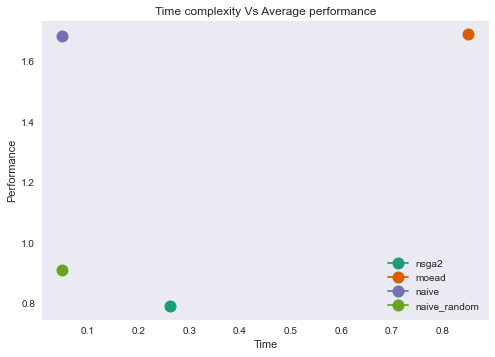

In [15]:
fig, axs = plt.subplots(1, 1)
# fig.set_figheight(15)
# fig.set_figwidth(10)
for j, drl in enumerate(moo+['naive', 'naive_random']):
    axs.plot(time_complexity[drl], average_perf[drl], label=drl, color=cmap(j), marker='o', markersize=12)
axs.set_title(f'Time complexity Vs Average performance')
axs.grid()
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [16]:
indexes = moo+['naive', 'naive_random']+evaluation

data = np.array([['','Col1','Col2'],['Row1',1,2],['Row2',3,4]])

df = pd.DataFrame(data=[[time_complexity[k], average_perf[k]] for k in indexes], index=indexes, columns=['time_complexity', 'average_perf'])
df

,time_complexity,average_perf
nsga2,0.262820,0.790438
moead,0.850729,1.689667
naive,0.050000,1.685500
naive_random,0.050000,0.909928
evaluation_distance,0.050000,1.142334
evaluation_load,0.050000,2.001299
evaluation_priority,0.050000,1.079731


In [17]:
SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

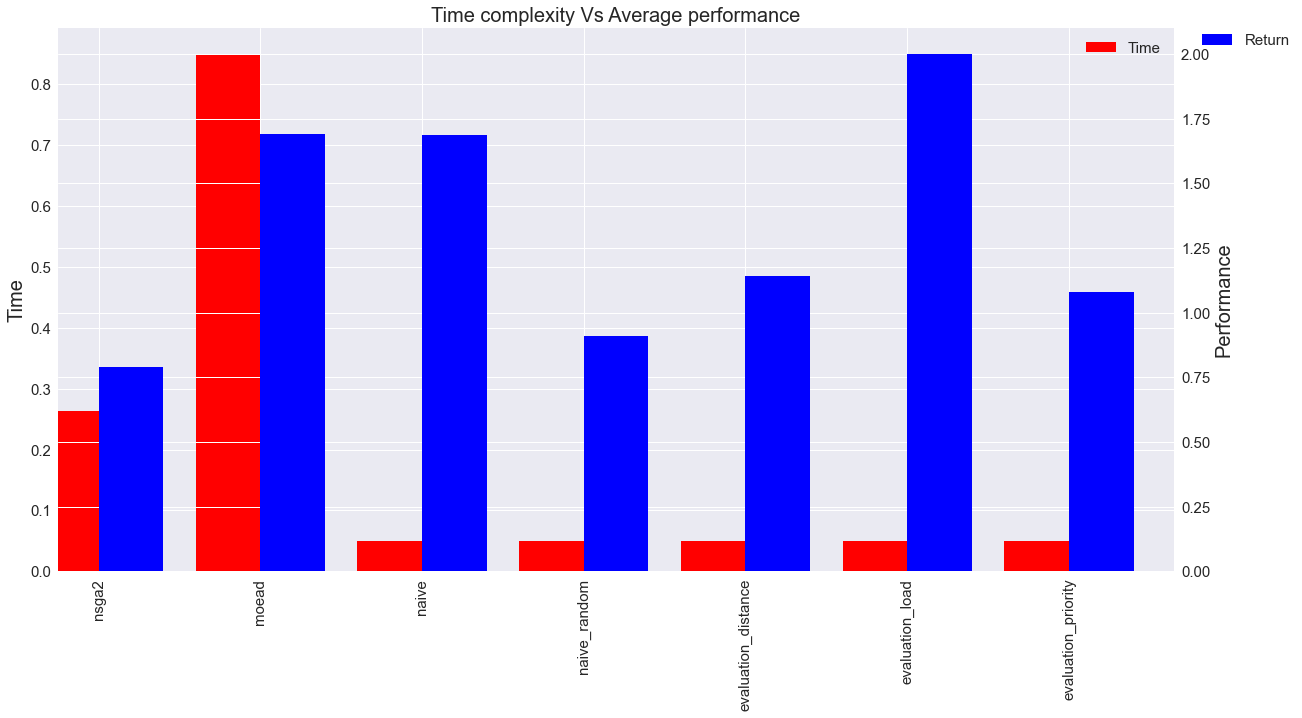

In [18]:
fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.time_complexity.plot(kind='bar', color='red', ax=ax, width=width, position=1, label='Time')
df.average_perf.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label='Return')

ax.set_ylabel('Time', fontsize=20)
ax2.set_ylabel('Performance', fontsize=20)
ax.set_title(f'Time complexity Vs Average performance', fontsize=20)
ax.legend()
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [19]:
df_test = df.sort_values('average_perf').reset_index(col_fill='test').set_index('average_perf').rename(columns={'index': 'name'})

In [20]:
df_test.reset_index()

,average_perf,name,time_complexity
0,0.790438,nsga2,0.262820
1,0.909928,naive_random,0.050000
2,1.079731,evaluation_priority,0.050000
3,1.142334,evaluation_distance,0.050000
4,1.685500,naive,0.050000
5,1.689667,moead,0.850729
6,2.001299,evaluation_load,0.050000


In [21]:
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


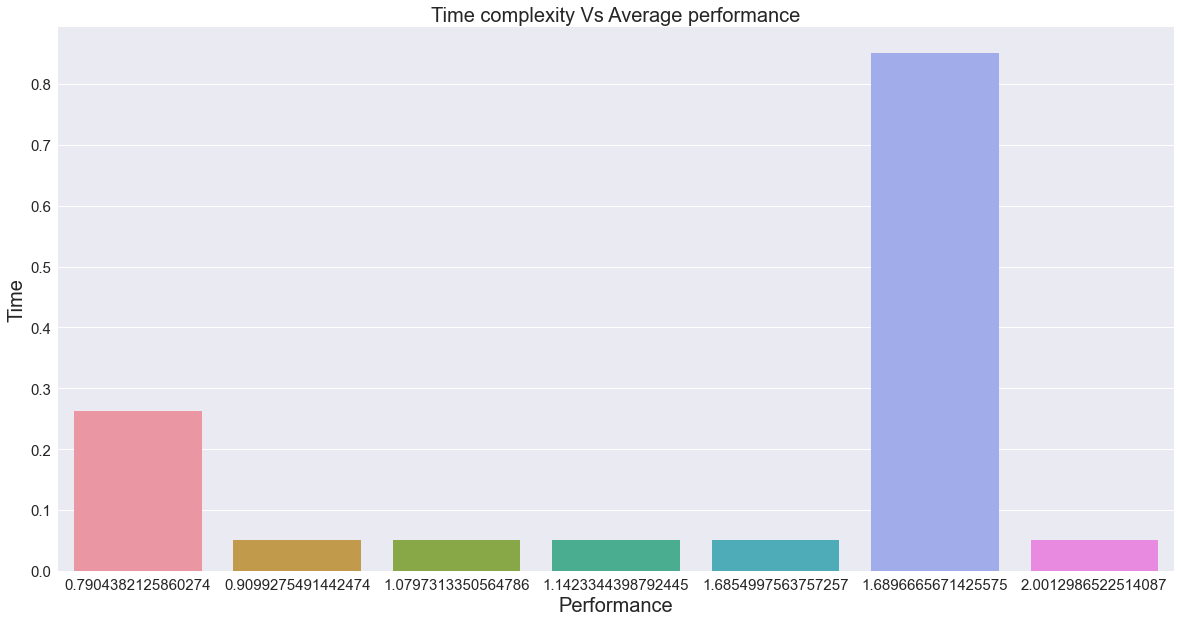

In [22]:
fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4

# df_test.time_complexity.plot(kind='bar', color='red', ax=ax, width=width, position=1, label=df_test.name)

sns.barplot(data=df_test.reset_index(), x="average_perf", y="time_complexity")

ax.set_ylabel('Time', fontsize=20)
ax.set_xlabel('Performance', fontsize=20)
ax.set_title(f'Time complexity Vs Average performance', fontsize=20)
ax.legend()
plt.show()

## Statistics

In [23]:
indexes = moo+['naive', 'naive_random']+evaluation
indexes

['nsga2',
 'moead',
 'naive',
 'naive_random',
 'evaluation_distance',
 'evaluation_load',
 'evaluation_priority']

In [44]:
dfs = pd.DataFrame(columns=['task_number', 'time(sec)', 'load', 'distance', 'priority', 'label'])
for i in indexes:
    df = pd.read_csv(f"statistics/{i}/statistics.txt")
    df['label'] = i
    dfs = dfs.append(df)
dfs['time(sec)'] = np.log(dfs['time(sec)'] + 1.0 )
dfs.head()

,task_number,time(sec),load,distance,priority,label
0,1,0.297281,-0.220000,-2124.0,-5.000000,nsga2
1,20,1.158868,-6.478148,-14697.0,-140.628236,nsga2
2,60,1.899436,-26.956601,-41752.0,-458.467735,nsga2
3,200,3.229144,-112.291807,-158353.0,-1623.648529,nsga2
4,600,4.534345,-322.820230,-555499.0,-5339.445492,nsga2


In [45]:
for i in [1, 20, 60, 200, 600, 999]:
    for obj in ['load', 'distance', 'priority']:
        maxi = np.max(dfs.loc[dfs['task_number']==i, obj])
        # print(f"maxi: {maxi}")
        mini = np.min(dfs.loc[dfs['task_number']==i, obj])
        # print(f"mini: {mini}")
        dfs.loc[dfs['task_number']==i, obj] = (dfs.loc[dfs['task_number']==i, obj] - mini + 0.1) / (maxi - mini + 0.1)
dfs

,task_number,time(sec),load,distance,priority,label
0,1,0.297281,0.651297,4.748113e-05,1.000000,nsga2
1,20,1.158868,0.773373,2.046394e-01,0.226358,nsga2
2,60,1.899436,0.678717,2.107071e-01,0.379652,nsga2
3,200,3.229144,0.498475,9.091699e-02,0.247949,nsga2
4,600,4.534345,0.536025,5.218294e-02,0.101776,nsga2
5,999,5.047584,0.471800,3.489481e-03,0.167470,nsga2
0,1,0.722051,0.994236,1.709795e-01,1.000000,moead
1,20,4.008685,0.590266,5.427673e-01,0.477929,moead
2,60,5.528535,0.841588,6.784386e-01,0.629817,moead
3,200,6.449940,0.807453,6.057662e-01,0.484151,moead


In [46]:
dfs['average_perf'] = dfs['load'] + dfs['distance'] + dfs['priority']
dfs.head()

,task_number,time(sec),load,distance,priority,label,average_perf
0,1,0.297281,0.651297,0.000047,1.000000,nsga2,1.651344
1,20,1.158868,0.773373,0.204639,0.226358,nsga2,1.204371
2,60,1.899436,0.678717,0.210707,0.379652,nsga2,1.269077
3,200,3.229144,0.498475,0.090917,0.247949,nsga2,0.837341
4,600,4.534345,0.536025,0.052183,0.101776,nsga2,0.689984


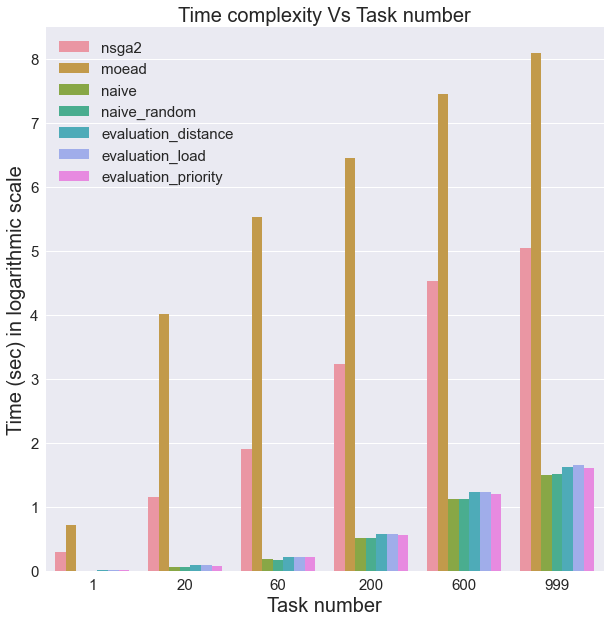

In [53]:
fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4

# df_test.time_complexity.plot(kind='bar', color='red', ax=ax, width=width, position=1, label=df_test.name)

sns.barplot(data=dfs.reset_index(), x="task_number", y="time(sec)", hue="label")

ax.set_ylabel('Time (sec) in logarithmic scale', fontsize=20)
ax.set_xlabel('Task number', fontsize=20)
ax.set_title(f'Time complexity Vs Task number', fontsize=20)
ax.legend()
plt.show()

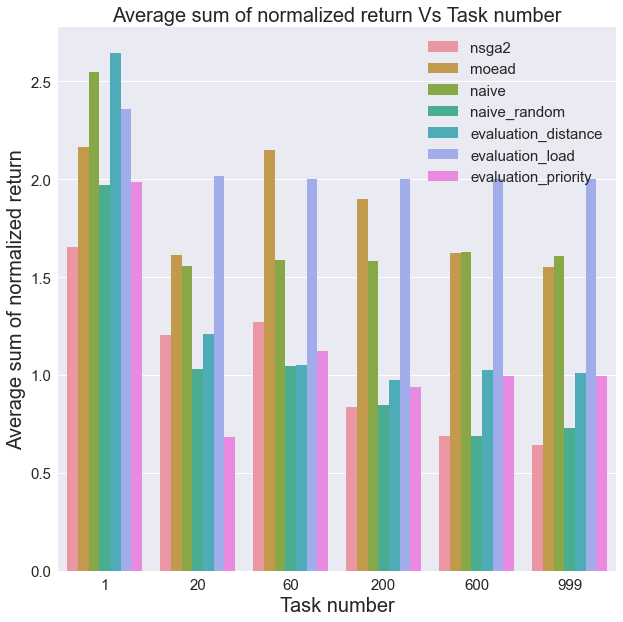

In [52]:
fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4

# df_test.time_complexity.plot(kind='bar', color='red', ax=ax, width=width, position=1, label=df_test.name)

sns.barplot(data=dfs.reset_index(), x="task_number", y="average_perf", hue="label")

ax.set_ylabel('Average sum of normalized return', fontsize=20)
ax.set_xlabel('Task number', fontsize=20)
ax.set_title(f'Average sum of normalized return Vs Task number', fontsize=20)
ax.legend()
plt.show()

In [49]:
dfs[['task_number', 'time(sec)', 'average_perf', 'label']]

,task_number,time(sec),average_perf,label
0,1,0.297281,1.651344,nsga2
1,20,1.158868,1.204371,nsga2
2,60,1.899436,1.269077,nsga2
3,200,3.229144,0.837341,nsga2
4,600,4.534345,0.689984,nsga2
5,999,5.047584,0.642759,nsga2
0,1,0.722051,2.165216,moead
1,20,4.008685,1.610962,moead
2,60,5.528535,2.149843,moead
3,200,6.449940,1.897370,moead
